In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customers.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

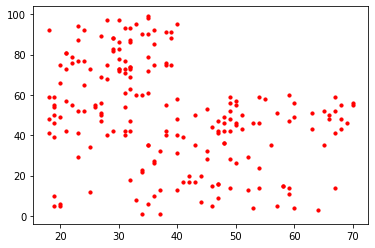

In [4]:
X=customers['Age']
Y=customers['Spending Score (1-100)']
plt.scatter(X,Y,s=10,c='red')

In [5]:
Z = np.array(list(zip(X,Y)))

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=2)

In [8]:
kmeans.fit(Z)

KMeans(n_clusters=2)

In [9]:
labels = kmeans.predict(Z)

In [10]:
customers['Cluster'] = labels
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1


In [11]:
customers['Cluster'].value_counts()

1    115
0     85
Name: Cluster, dtype: int64

In [12]:
k = customers['Cluster'].value_counts().shape[0]

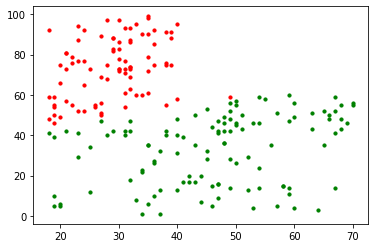

In [13]:
plt.scatter(X[customers['Cluster']==0],Y[customers['Cluster']==0],s=10,c='red')
plt.scatter(X[customers['Cluster']==1],Y[customers['Cluster']==1],s=10,c='green')
#plt.scatter(X[customers['Cluster']==2],Y[customers['Cluster']==2],s=10,c='blue')
#plt.scatter(X[customers['Cluster']==3],Y[customers['Cluster']==3],s=10,c='yellow')
#plt.scatter(X[customers['Cluster']==4],Y[customers['Cluster']==4],s=10,c='cyan')
#plt.scatter(X[customers['Cluster']==5],Y[customers['Cluster']==5],s=10,c='m')
#plt.scatter(X[customers['Cluster']==6],Y[customers['Cluster']==6],s=10,c='k')

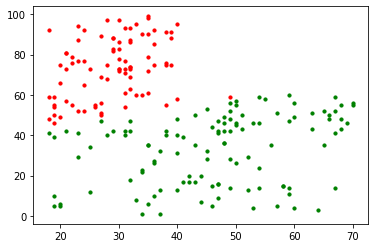

In [14]:
color = ['r','g','b','y','c','m','k','grey']
for i in range(k):
    plt.scatter(X[customers['Cluster']==i],Y[customers['Cluster']==i],s=10,c=color[i])

In [16]:
kmeans.inertia_

75949.15601023012

In [18]:
inertia = []
for n in range(1,11):
    alogm = KMeans(n_clusters = n)
    alogm.fit(Z)
    inertia.append(alogm.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
inertia

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23811.5235247209,
 19566.5223413776,
 15514.193134351033,
 12997.449288119293,
 11524.866904788883,
 10205.067533068786]

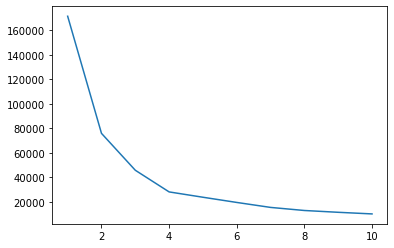

In [28]:
x = []
for i in range(1,11):
    x.append(i)
y = inertia
plt.plot(x,y)

In [33]:
n = 4
kmeans2 = KMeans(n_clusters = n)
kmeans2.fit(Z)
labels2 = kmeans2.predict(Z)
customers2 = customers
customers2['Cluster'] = labels2

In [34]:
customers2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1


In [35]:
customers2['Cluster'].value_counts()

2    57
0    48
3    48
1    47
Name: Cluster, dtype: int64

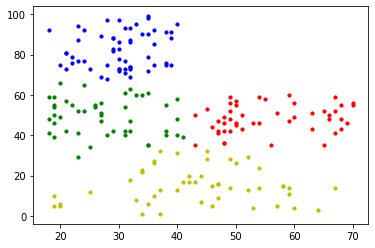

In [36]:
color = ['r','g','b','y','c','m','k','grey']
for i in range(n):
    plt.scatter(X[customers['Cluster']==i],Y[customers['Cluster']==i],s=10,c=color[i])